In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.cluster import KMeans, DBSCAN

In [5]:
from sklearn.metrics import silhouette_score

In [17]:
file_path = 'C:/Users/paula/Downloads/gunshots/updated_with_coordinates.csv'
data = pd.read_csv(file_path)

In [18]:
data = data.drop(columns=["Operations", "Coordinates_Found"])
data = data.dropna(subset=["Address"])
data["Incident Date"] = pd.to_datetime(data["Incident Date"], errors="coerce")

In [19]:
numeric_features = ["Victims Killed", "Victims Injured", "Suspects Killed", "Suspects Injured", "Latitude", "Longitude"]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_features])

In [20]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
data['KMeans_Cluster'] = kmeans_labels
silhouette_avg = silhouette_score(scaled_data, kmeans_labels)

C:\Users\paula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


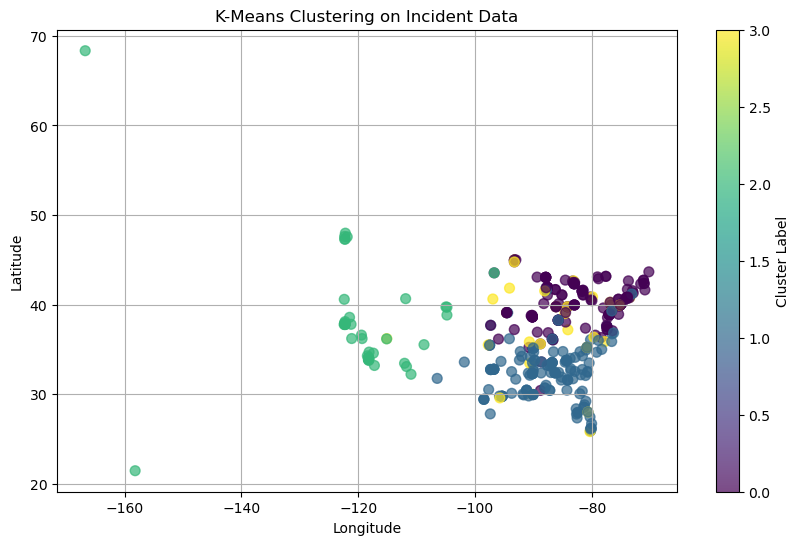

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(data["Longitude"], data["Latitude"], c=data["KMeans_Cluster"], cmap="viridis", alpha=0.7, s=50)
plt.colorbar(label="Cluster Label")
plt.title("K-Means Clustering on Incident Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [22]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
data['DBSCAN_Cluster'] = dbscan_labels

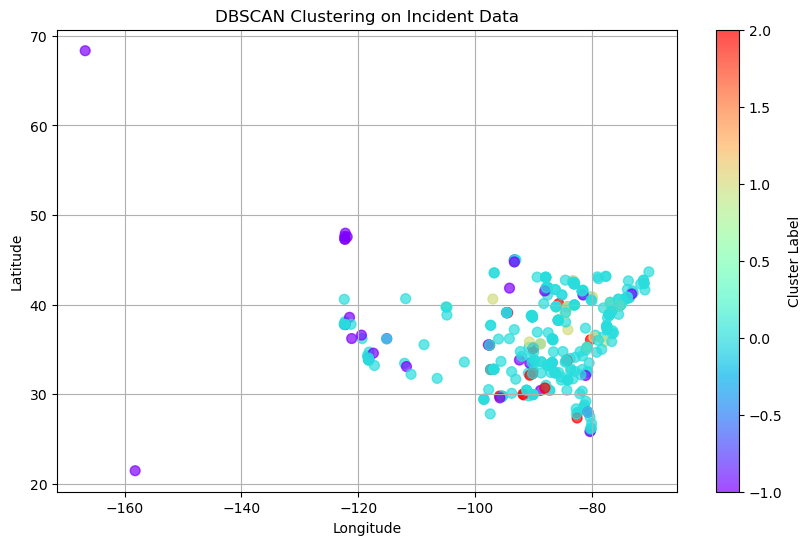

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(data["Longitude"], data["Latitude"], c=data["DBSCAN_Cluster"], cmap="rainbow", alpha=0.7, s=50)
plt.colorbar(label="Cluster Label")
plt.title("DBSCAN Clustering on Incident Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [24]:
unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
noise_points = list(dbscan_labels).count(-1)
print(f"K-Means Silhouette Score: {silhouette_avg}")
print(f"DBSCAN Unique Clusters: {unique_clusters}, Noise Points: {noise_points}")

K-Means Silhouette Score: 0.2661641069262072
DBSCAN Unique Clusters: 3, Noise Points: 34


In [25]:
data.to_csv('processed_incident_data.csv', index=False)